In [1]:
# 기본적인 라이브러리
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 구글 드라이브 연동

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 이론 문제

(직접 종이나 아이패드에 써서 코랩에 이미지 파일로 업로드 해주시면 됩니다)

1.SVM의 수리적 모델링에서, 목적함수를 적고 증명과정을 서술하시오**

**2. 시그모이드 함수의 공식, 정의역, 치역을 작성하시오**

**3. 코드 실습 영상을 참고하여, 아래 그림과 같은 데이터의 F1-score를 계산하시오**


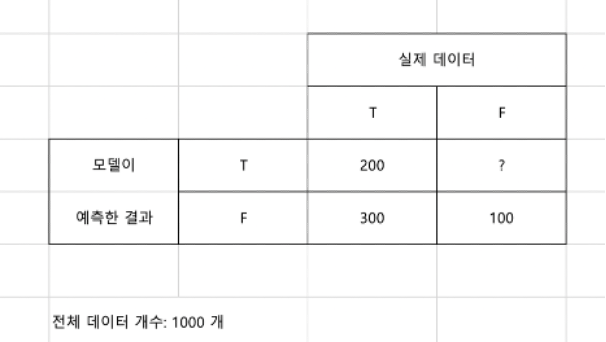

![picture](<https://drive.google.com/uc?id=1trCyCUklNIdAZ5zYa9hnbVtQlglEOmJ8>) 

![picture](<https://drive.google.com/uc?id=1IO5Kwxq_nIyFfeFuqLw4S4ta8-Pr_32t>)

# 문제 1

사용할 데이터 : house.csv

네이버 부동산에서 크롤링해 가져온 서울시 부동산 데이터

* Unnamed: 0 : 의미없는 칼럼
* id : 매물id
> 한 매물당 하나의 id가 할당된다.
* lat : 위도
* lng : 경도
* gu : 구(행정지역정보)
* goodsType : 매물의 거래형태(아파트,빌라 등)
* payType : 판매의 거래형태(월세,매매 등)
* floor : 매물방의 층수
* floor_total : 매물이 있는 전체 건물의 층수
* contractArea : 계약면적
* realArea : 실제면적
* direction : 창문방향(남향,북향)
* tag : 매물마다 관련된 설명정보
> ex. 일조량 및 관리 잘 된 복층
* tagList : 매물마다 관련된 설명에서의 태그
> ex. '10년이내, 25년이내 건축, 복층'과 같이 인스타 해시테그 느낌
* deposit : 보증금
* monthlyPay : 월세


> 데이터 출처 : 네이버 부동산 크롤링 데이터

설명
* X와 y를 찾아, LinearRegression을 위 예제1을 참고하여 실행하시오.
* 예를 들면, y='보증금', X=나머지 으로 하여 나머지 값으로 보증금을 예측하는 선형회귀문제로 Task를 정해 코딩을 진행

* 조건
> * ***(핵심내용)*** X & y로 이용할 것을 명확히 제시하고, y에 따른 어떤 문제인지 파악하기
>    * y를 연속형으로 하여, LinearRegression문제가 될 수 있도록 한다.
> * X변수에 1개이상의 범주형데이터를 포함하고, one-hot encoding을 사용하기
> * 최소 1가지 이상의 방법으로 X데이터 중 1개 이상의 열을 삭제하기
> * 데이터 분할 진행하기
> * ***(핵심내용)*** 다중선형회귀 모델을 사용하기
> * 규제항이 있는 모델(Ridge,Lasso)을 사용하기
> * hyper-parameter 튜닝을 진행하기
>   * cross_val_score를 사용하지 않아도 됩니다.
>   * GridSearchCV ,RandomSearchCV을 사용하셔도 됩니다.
>   * 참고자료 : https://dacon.io/codeshare/
> * ***(핵심내용)*** 변수 중요도 해석
>   * 스케일링 없이
>   * min-max scaling
>   * standard scaling

In [3]:
#데이터 불러오기
path1 = '/content/drive/MyDrive/DSL2023/house.csv'
house = pd.read_csv(path1)
house.head()

,Unnamed: 0,id,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,tag,tagList,deposit,monthlyPay
0,0,2233636969,37.677967,127.041725,dobong,아파트,매매,5,5,81,63,남향,ok. 일조량 및 관리 잘 된 복층,"['10년이내', '역세권', '복층', '탑층']",63000,0
1,3,2232935032,37.657623,127.044115,dobong,아파트,매매,15,24,154,119,남향,기본 로얄동 로얄층 채광 GOOD,"['25년이내', '대단지', '대형평수', '방네개이상']",140000,0
2,4,2232502309,37.645001,127.040034,dobong,빌라,전세,3,4,38,33,남향,올수리 베란다크고 주차 남향 초등학교 대형마트 재래시장 5분,"['25년이상', '융자금적은', '올수리', '화장실한개']",15000,0
3,5,2232883418,37.666850,127.039420,dobong,아파트,매매,5,18,107,84,남향,내부상태아주좋습니다 방학역세권 도깨비시장근접함 주인거주,"['25년이상', '방세개', '화장실두개', '주차가능']",60000,0
4,6,2234171117,37.655622,127.041475,dobong,사무실,월세,2,8,30,22,북향,빠른입주가능 상태깨끗 창동역도보7분 사무실강추,"['25년이내', '융자금없는', '주차가능', '북향']",700,44


In [4]:
#Task 지정
#y = '월세' X = 나머지
#X 에 속해 있는 변수들을 사용하여 월세를 예측해보고자 한다

In [5]:
#그러기 위해서는 월세를 payType이 월세인 데이터들만을 추출해야 한다
house1 = house[house['payType'] == '월세']
house1

,Unnamed: 0,id,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,tag,tagList,deposit,monthlyPay
4,6,2234171117,37.655622,127.041475,dobong,사무실,월세,2,8,30,22,북향,빠른입주가능 상태깨끗 창동역도보7분 사무실강추,"['25년이내', '융자금없는', '주차가능', '북향']",700,44
9,11,2234013517,37.643538,127.038183,dobong,상가,월세,1,2,79,79,남서향,"넓은 평수, 유동인구 많은 길목, 시인성 Good, 업종무관","['25년이상', '융자금없는', '1층', '총2층']",2500,130
12,14,2233556356,37.657460,127.027020,dobong,아파트,월세,1,14,102,84,남향,특올수리 학군및 생활편의좋은 추천매물입니다.,"['25년이상', '융자금적은', '올수리', '1층']",5000,150
20,24,2234044131,37.672512,127.046283,dobong,상가,월세,1,4,80,80,동향,"BEST 대로변 코너 1층 상가 가시성,접근성 좋음 주차가능","['25년이상', '융자금없는', '1층', '주차가능']",4000,241
25,30,2233929699,37.658373,127.038460,dobong,상가,월세,1,4,60,49,남동향,"7년 성업중, 권리금 유","['25년이상', '융자금없는', '1층', '총4층']",1000,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93985,104988,2233497578,37.488543,127.051132,gangnam,오피스텔,월세,1,32,1829,809,남향,실57 소유주직접 실매물 남향 특급매물 용도변경가능 깨끗하고 넓은 업무공,"['25년이내', '융자금없는', '역세권', '급매']",15000,912
93988,104992,2234183686,37.499981,127.046363,gangnam,아파트,월세,5,7,37,24,남향,"신축, 넓은평, 베란더, 풀옵션, 남향, 첫입주","['2년이내', '융자금없는', '소형평수']",35000,60
93989,104993,2233617174,37.475027,127.101550,gangnam,아파트,월세,0,15,101,74,남동향,"금액조정 가능, 앞뒤로 녹지경관뷰, 인덕션, 식기세척기, 에어컨","['10년이내', '융자금적은', '화장실두개', '방세개']",30000,200
93990,104994,2233562154,37.503072,127.026543,gangnam,사무실,월세,5,6,148,90,남향,신논현역.신축. 첫 입주.층고3.8m.통창뷰,"['2년이내', '융자금없는', '역세권']",7000,700


In [6]:
house1.shape

(37803, 16)

(array([3.78e+04, 1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([1.00000000e+00, 1.21500090e+06, 2.43000080e+06, 3.64500070e+06,
        4.86000060e+06, 6.07500050e+06, 7.29000040e+06, 8.50500030e+06,
        9.72000020e+06, 1.09350001e+07, 1.21500000e+07]),
 <a list of 10 Patch objects>)

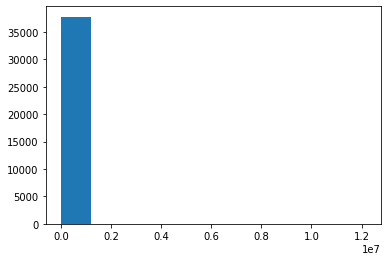

In [7]:
# y(label)값 뜯어내기
y_label = house1.loc[:,'monthlyPay']

# y값 분포 확인
y_label.value_counts()
plt.hist(y_label.values)

In [8]:
#outlier들이 다수 있는 것 같다. 없애버리자!
q1=house1['monthlyPay'].quantile(0.25)
q2=house1['monthlyPay'].quantile(0.5)
q3=house1['monthlyPay'].quantile(0.75)
iqr=q3-q1

condition=house1['monthlyPay']>q3+1.5*iqr
house1[condition]

a=house1[condition].index
house1.drop(a,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
#성공적으로 제거!
house1.shape

(34146, 16)

(array([7317., 8898., 6247., 4363., 2418., 1721., 1130., 1137.,  444.,
         471.]),
 array([  1. ,  64.4, 127.8, 191.2, 254.6, 318. , 381.4, 444.8, 508.2,
        571.6, 635. ]),
 <a list of 10 Patch objects>)

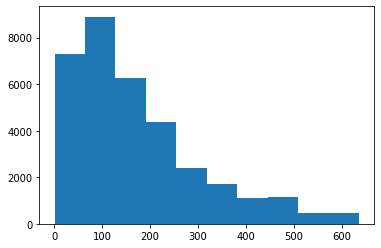

In [10]:
# y(label)값 뜯어내기
y_label = house1.loc[:,'monthlyPay']

# y값 분포 확인
y_label.value_counts()
plt.hist(y_label.values)

#호오.... 보기 좋아졌다

In [11]:
X_features = house1.drop(['monthlyPay'], axis=1)
X_features.columns 
#Unnamed: 0 을 포함한 y 를 구하는데 필요 없어 보이는 변수가 몇개 보인다. 없애버리자!

Index(['Unnamed: 0', 'id', 'lat', 'lng', 'gu', 'goodsType', 'payType', 'floor',
       'floor_total', 'contractArea', 'realArea', 'direction', 'tag',
       'tagList', 'deposit'],
      dtype='object')

In [12]:
X_features = X_features.drop(['Unnamed: 0','id','lat','lng','tag','tagList'], axis = 1)
X_features
#성공적으로 제거!

,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,deposit
4,dobong,사무실,월세,2,8,30,22,북향,700
9,dobong,상가,월세,1,2,79,79,남서향,2500
12,dobong,아파트,월세,1,14,102,84,남향,5000
20,dobong,상가,월세,1,4,80,80,동향,4000
25,dobong,상가,월세,1,4,60,49,남동향,1000
...,...,...,...,...,...,...,...,...,...
93979,gangnam,사무실,월세,3,6,237,231,서향,10000
93981,gangnam,상가,월세,3,3,171,171,서향,4500
93982,gangnam,사무실,월세,10,13,190,165,북향,6000
93988,gangnam,아파트,월세,5,7,37,24,남향,35000


In [13]:
#혹시 결측치가 있을까?? 있다면 없애버리자!
house1.isnull().sum()
#tag, Unnamed: 0, id, lat, lng는 어차피 사용하지 않기 때문에 결측치가 없어도 상관없다. 문제는 direction... 결측치가 무려 2213개이다.

Unnamed: 0         0
id                 0
lat                0
lng                0
gu                 0
goodsType          0
payType            0
floor              0
floor_total        0
contractArea       0
realArea           0
direction       2213
tag             1885
tagList            0
deposit            0
monthlyPay         0
dtype: int64

In [14]:
#결측치... 속 시원하게 없애버리자!
house1 = house1.dropna()
house1.isnull().sum()
#굿

Unnamed: 0      0
id              0
lat             0
lng             0
gu              0
goodsType       0
payType         0
floor           0
floor_total     0
contractArea    0
realArea        0
direction       0
tag             0
tagList         0
deposit         0
monthlyPay      0
dtype: int64

In [15]:
#사용하고자 하는 X_features를 보아하니 범주형 데이터들이 있는 것 같다... one hot encoding 을 해보자!
#범주형: gu, goodsType, payType, direction
house1 = pd.get_dummies(house1, columns = ['gu','goodsType','payType','direction'], drop_first= True)
house1 

,Unnamed: 0,id,lat,lng,floor,floor_total,contractArea,realArea,tag,tagList,...,goodsType_원룸,goodsType_재건축,goodsType_전원주택,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향
4,6,2234171117,37.655622,127.041475,2,8,30,22,빠른입주가능 상태깨끗 창동역도보7분 사무실강추,"['25년이내', '융자금없는', '주차가능', '북향']",...,0,0,0,0,0,0,0,0,1,0
9,11,2234013517,37.643538,127.038183,1,2,79,79,"넓은 평수, 유동인구 많은 길목, 시인성 Good, 업종무관","['25년이상', '융자금없는', '1층', '총2층']",...,0,0,0,1,0,0,0,0,0,0
12,14,2233556356,37.657460,127.027020,1,14,102,84,특올수리 학군및 생활편의좋은 추천매물입니다.,"['25년이상', '융자금적은', '올수리', '1층']",...,0,0,0,0,1,0,0,0,0,0
20,24,2234044131,37.672512,127.046283,1,4,80,80,"BEST 대로변 코너 1층 상가 가시성,접근성 좋음 주차가능","['25년이상', '융자금없는', '1층', '주차가능']",...,0,0,0,0,0,1,0,0,0,0
25,30,2233929699,37.658373,127.038460,1,4,60,49,"7년 성업중, 권리금 유","['25년이상', '융자금없는', '1층', '총4층']",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93979,104982,2233903670,37.508842,127.034329,3,6,237,231,사진o. 언주역 초역세권 사무실. 인테리어 무상승계,"['25년이내', '융자금없는', '역세권', '주차가능']",...,0,0,0,0,0,0,0,0,0,1
93981,104984,2233963074,37.502912,127.037748,3,3,171,171,무권리 역삼역 도보 4분 먹자골목 내 3층 상가,"['25년이내', '융자금없는', '역세권', '관리비10만원이하']",...,0,0,0,0,0,0,0,0,0,1
93982,104985,2233822097,37.511885,127.050235,10,13,190,165,삼성중앙역 역세권 대로변 가성비좋은 신축급 빌딩임대,"['10년이내', '융자금없는', '역세권']",...,0,0,0,0,0,0,0,0,1,0
93988,104992,2234183686,37.499981,127.046363,5,7,37,24,"신축, 넓은평, 베란더, 풀옵션, 남향, 첫입주","['2년이내', '융자금없는', '소형평수']",...,0,0,0,0,1,0,0,0,0,0


In [16]:
#뭔가 어지럽다.... 일단 쓰지 않기로 한 열들을 모두 제거하자
#(생각해보니 payType이라는 변수도 더 이상 필요하지 않다... 이미 월세인 것만을 골라낸 데이터이다)
house1 = house1.drop(['Unnamed: 0','id','lat','lng','tag','tagList'], axis = 1)
house1

,floor,floor_total,contractArea,realArea,deposit,monthlyPay,gu_dongdaemun,gu_dongjak,gu_eunpyeong,gu_gangbuk,...,goodsType_원룸,goodsType_재건축,goodsType_전원주택,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향
4,2,8,30,22,700,44,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,2,79,79,2500,130,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12,1,14,102,84,5000,150,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20,1,4,80,80,4000,241,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
25,1,4,60,49,1000,150,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93979,3,6,237,231,10000,450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
93981,3,3,171,171,4500,440,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
93982,10,13,190,165,6000,450,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
93988,5,7,37,24,35000,60,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
#몇개의 변수들이 보이지 않는다 모두 보이게 하자!
pd.options.display.max_columns = None
house1

,floor,floor_total,contractArea,realArea,deposit,monthlyPay,gu_dongdaemun,gu_dongjak,gu_eunpyeong,gu_gangbuk,gu_gangdong,gu_gangnam,gu_gangseo,gu_guemcheon,gu_guro,gu_gwanak,gu_gwangjin,gu_jongno,gu_jung,gu_jungnang,gu_mapo,gu_nowon,gu_seocho,gu_seodaemun,gu_seongbuk,gu_seongdong,gu_songpa,gu_yangcheon,gu_yeongdeungpo,gu_yongsan,goodsType_빌라,goodsType_사무실,goodsType_상가,goodsType_상가주택,goodsType_아파트,goodsType_아파트분양권,goodsType_오피스텔,goodsType_오피스텔분양권,goodsType_원룸,goodsType_재건축,goodsType_전원주택,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향
4,2,8,30,22,700,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,2,79,79,2500,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12,1,14,102,84,5000,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
20,1,4,80,80,4000,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
25,1,4,60,49,1000,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93979,3,6,237,231,10000,450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
93981,3,3,171,171,4500,440,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
93982,10,13,190,165,6000,450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
93988,5,7,37,24,35000,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
# 변경된 'y_label', 'X_features' 만들기

y_label = house1.loc[:,'monthlyPay']
X_features = house1.drop(['monthlyPay'], axis=1)

In [19]:
#전에 사용하지 않을 열들을 모두 제거 하였다. 이제 다중공선성으로 변수들을 제거해보자!
#우선 변수들관의 상관관계를 파악하자!
cor_matrix = abs(X_features.corr())

for i in range(len(cor_matrix.columns)):
    cor_matrix.iloc[i,i] = 0

cor_matrix

,floor,floor_total,contractArea,realArea,deposit,gu_dongdaemun,gu_dongjak,gu_eunpyeong,gu_gangbuk,gu_gangdong,gu_gangnam,gu_gangseo,gu_guemcheon,gu_guro,gu_gwanak,gu_gwangjin,gu_jongno,gu_jung,gu_jungnang,gu_mapo,gu_nowon,gu_seocho,gu_seodaemun,gu_seongbuk,gu_seongdong,gu_songpa,gu_yangcheon,gu_yeongdeungpo,gu_yongsan,goodsType_빌라,goodsType_사무실,goodsType_상가,goodsType_상가주택,goodsType_아파트,goodsType_아파트분양권,goodsType_오피스텔,goodsType_오피스텔분양권,goodsType_원룸,goodsType_재건축,goodsType_전원주택,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향
floor,0.000000,0.693572,0.000740,0.093904,0.423550,0.020994,0.041228,0.051825,0.074967,0.001468,0.012816,0.041535,0.040351,0.031829,0.061860,0.004048,0.017065,0.017748,0.028408,0.001176,0.016253,0.066704,0.022170,0.026332,0.000344,0.058027,0.005111,0.023793,0.052403,0.052148,0.015719,0.391843,0.031994,0.543333,0.066241,0.196839,0.027631,0.115109,0.038685,0.001734,0.031701,0.089743,0.037760,0.049886,0.038036,0.057757,0.065662
floor_total,0.693572,0.000000,0.009245,0.073389,0.507173,0.022270,0.040600,0.056226,0.090349,0.000269,0.008530,0.049561,0.060391,0.043317,0.073400,0.002551,0.026133,0.011889,0.039252,0.004173,0.015154,0.075549,0.028741,0.019441,0.015728,0.060919,0.005756,0.023171,0.077785,0.103292,0.074672,0.294062,0.061503,0.632986,0.069617,0.187532,0.026291,0.157421,0.028768,0.004492,0.043511,0.090920,0.048314,0.050356,0.050076,0.046990,0.066815
contractArea,0.000740,0.009245,0.000000,0.018963,0.001180,0.001316,0.003043,0.002302,0.001204,0.000594,0.000253,0.000602,0.001202,0.001446,0.004654,0.001984,0.000790,0.000637,0.002352,0.001683,0.001744,0.000111,0.001669,0.033061,0.001337,0.000200,0.000446,0.001690,0.000481,0.004027,0.006076,0.007266,0.000865,0.001559,0.000549,0.002689,0.000829,0.009210,0.000197,0.000198,0.002757,0.003123,0.003131,0.024290,0.001207,0.001609,0.002435
realArea,0.093904,0.073389,0.018963,0.000000,0.171227,0.009555,0.068777,0.018246,0.039339,0.009556,0.047021,0.018622,0.043324,0.029210,0.142892,0.008798,0.031205,0.030049,0.037230,0.001807,0.001869,0.075063,0.000578,0.004899,0.013261,0.031416,0.024145,0.031524,0.016472,0.124058,0.326122,0.014614,0.035551,0.077024,0.008568,0.122478,0.029267,0.307358,0.015661,0.006558,0.012076,0.024658,0.014809,0.005166,0.030689,0.002887,0.015353
deposit,0.423550,0.507173,0.001180,0.171227,0.000000,0.025817,0.008181,0.025845,0.060442,0.007242,0.089581,0.069076,0.066480,0.029495,0.063060,0.016048,0.010176,0.041167,0.042188,0.007239,0.025351,0.212072,0.000765,0.001261,0.041626,0.038715,0.045547,0.004369,0.059747,0.007745,0.206362,0.236220,0.019049,0.637589,0.068477,0.024011,0.007090,0.133862,0.066468,0.002812,0.032993,0.140902,0.058001,0.049391,0.049843,0.097958,0.088001
gu_dongdaemun,0.020994,0.022270,0.001316,0.009555,0.025817,0.000000,0.042061,0.038048,0.040656,0.038232,0.043984,0.048970,0.037400,0.035900,0.046296,0.042981,0.037734,0.041857,0.036874,0.044920,0.036609,0.044260,0.038940,0.034303,0.042531,0.044114,0.038048,0.040621,0.036361,0.004984,0.004458,0.009184,0.016067,0.008686,0.012416,0.009139,0.001485,0.026477,0.011311,0.001141,0.009828,0.022494,0.011940,0.000068,0.004135,0.012873,0.012537
gu_dongjak,0.041228,0.040600,0.003043,0.068777,0.008181,0.042061,0.000000,0.040666,0.043454,0.040862,0.047011,0.052340,0.039974,0.038371,0.049482,0.045939,0.040331,0.044738,0.039412,0.048012,0.039129,0.047306,0.041620,0.036664,0.045458,0.047150,0.040666,0.043417,0.038864,0.001382,0.080513,0.022700,0.009237,0.013109,0.013270,0.038439,0.007113,0.135793,0.012090,0.001219,0.015476,0.002075,0.001837,0.015548,0.014020,0.011668,0.011352
gu_eunpyeong,0.051825,0.056226,0.002302,0.018246,0.025845,0.038048,0.040666,0.000000,0.039308,0.036964,0.042526,0.047347,0.036160,0.034710,0.044762,0.041557,0.036484,0.040470,0.035652,0.043431,0.035396,0.042793,0.037649,0.033166,0.041122,0.042652,0.036787,0.039275,0.035156,0.008259,0.090941,0.115799,0.006858,0.007035,0.012004,0.025649,0.006435,0.015832,0.010936,0.001103,0.038829,0.030354,

In [20]:
# 1. 상관관수값이 가장 큰 두 축을 찾아보자!

idx = np.where(cor_matrix == cor_matrix.max().max())[0]
print('columns of max corr : {} & {}'.format(cor_matrix.columns[idx[0]], cor_matrix.columns[idx[1]]))

columns of max corr : floor & floor_total


In [21]:
# 2. 서로 상관관계가 높은 것들 중 y_label과의 상관관계가 높은 것을 남겨두고, 낮은 것을 제거한다. 

print('floor :', X_features.loc[:,'floor'].corr(y_label))
print('floor_total :', X_features.loc[:,'floor_total'].corr(y_label))

floor : -0.018827970396631758
floor_total : 0.054816311669714055


In [22]:
X2_features = X_features.drop('floor', axis=1)
X2_features.columns

Index(['floor_total', 'contractArea', 'realArea', 'deposit', 'gu_dongdaemun',
       'gu_dongjak', 'gu_eunpyeong', 'gu_gangbuk', 'gu_gangdong', 'gu_gangnam',
       'gu_gangseo', 'gu_guemcheon', 'gu_guro', 'gu_gwanak', 'gu_gwangjin',
       'gu_jongno', 'gu_jung', 'gu_jungnang', 'gu_mapo', 'gu_nowon',
       'gu_seocho', 'gu_seodaemun', 'gu_seongbuk', 'gu_seongdong', 'gu_songpa',
       'gu_yangcheon', 'gu_yeongdeungpo', 'gu_yongsan', 'goodsType_빌라',
       'goodsType_사무실', 'goodsType_상가', 'goodsType_상가주택', 'goodsType_아파트',
       'goodsType_아파트분양권', 'goodsType_오피스텔', 'goodsType_오피스텔분양권',
       'goodsType_원룸', 'goodsType_재건축', 'goodsType_전원주택', 'direction_남서향',
       'direction_남향', 'direction_동향', 'direction_북동향', 'direction_북서향',
       'direction_북향', 'direction_서향'],
      dtype='object')

In [23]:
#추가해서 VIF를 사용해보자!

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["features"] = X2_features.columns 

vif["VIF Factor"] = [variance_inflation_factor(X_features.values, i) for i in range(X2_features.shape[1])] 

vif

,features,VIF Factor
0,floor_total,4.014719
1,contractArea,6.319226
2,realArea,1.003825
3,deposit,3.687749
4,gu_dongdaemun,2.595431
5,gu_dongjak,1.449505
6,gu_eunpyeong,1.521700
7,gu_gangbuk,1.453157
8,gu_gangdong,1.507283
9,gu_gangnam,1.449502


In [24]:
#호오...VIF가 10이 넘어가면 다중공선성이 있다고 판단하고 5가 넘어가면 주의할 필요가 있다고 봅니다! 따라서 VIF가 5가 넘어가는 contractArea, goodsType_상가주택, goodstype_아파트분양권 제거하기!
X3_features = X2_features.drop(['contractArea','goodsType_상가주택','goodsType_아파트분양권'],axis=1)
X3_features.columns

Index(['floor_total', 'realArea', 'deposit', 'gu_dongdaemun', 'gu_dongjak',
       'gu_eunpyeong', 'gu_gangbuk', 'gu_gangdong', 'gu_gangnam', 'gu_gangseo',
       'gu_guemcheon', 'gu_guro', 'gu_gwanak', 'gu_gwangjin', 'gu_jongno',
       'gu_jung', 'gu_jungnang', 'gu_mapo', 'gu_nowon', 'gu_seocho',
       'gu_seodaemun', 'gu_seongbuk', 'gu_seongdong', 'gu_songpa',
       'gu_yangcheon', 'gu_yeongdeungpo', 'gu_yongsan', 'goodsType_빌라',
       'goodsType_사무실', 'goodsType_상가', 'goodsType_아파트', 'goodsType_오피스텔',
       'goodsType_오피스텔분양권', 'goodsType_원룸', 'goodsType_재건축', 'goodsType_전원주택',
       'direction_남서향', 'direction_남향', 'direction_동향', 'direction_북동향',
       'direction_북서향', 'direction_북향', 'direction_서향'],
      dtype='object')

In [25]:
vif1 = pd.DataFrame()

vif1["features"] = X3_features.columns 

vif1["VIF Factor"] = [variance_inflation_factor(X3_features.values, i) for i in range(X3_features.shape[1])] 

vif1
#VIF가 5를 넘어가는 변수가 하나 더 보인다! 'floor_total'도 제거해주자!

,features,VIF Factor
0,floor_total,5.008889
1,realArea,3.666657
2,deposit,2.578946
3,gu_dongdaemun,1.416149
4,gu_dongjak,1.486787
5,gu_eunpyeong,1.422849
6,gu_gangbuk,1.468296
7,gu_gangdong,1.413656
8,gu_gangnam,1.612821
9,gu_gangseo,1.850403


In [26]:
X4_features = X3_features.drop(['floor_total'],axis=1)
X4_features.columns

Index(['realArea', 'deposit', 'gu_dongdaemun', 'gu_dongjak', 'gu_eunpyeong',
       'gu_gangbuk', 'gu_gangdong', 'gu_gangnam', 'gu_gangseo', 'gu_guemcheon',
       'gu_guro', 'gu_gwanak', 'gu_gwangjin', 'gu_jongno', 'gu_jung',
       'gu_jungnang', 'gu_mapo', 'gu_nowon', 'gu_seocho', 'gu_seodaemun',
       'gu_seongbuk', 'gu_seongdong', 'gu_songpa', 'gu_yangcheon',
       'gu_yeongdeungpo', 'gu_yongsan', 'goodsType_빌라', 'goodsType_사무실',
       'goodsType_상가', 'goodsType_아파트', 'goodsType_오피스텔', 'goodsType_오피스텔분양권',
       'goodsType_원룸', 'goodsType_재건축', 'goodsType_전원주택', 'direction_남서향',
       'direction_남향', 'direction_동향', 'direction_북동향', 'direction_북서향',
       'direction_북향', 'direction_서향'],
      dtype='object')

In [27]:
vif1 = pd.DataFrame()

vif1["features"] = X4_features.columns 

vif1["VIF Factor"] = [variance_inflation_factor(X4_features.values, i) for i in range(X4_features.shape[1])] 

vif1
#VIF가 5를 넘어가는 변수가 더 이상 보이지 않는다! 굿!

,features,VIF Factor
0,realArea,3.666536
1,deposit,2.494316
2,gu_dongdaemun,1.407738
3,gu_dongjak,1.480138
4,gu_eunpyeong,1.419487
5,gu_gangbuk,1.463907
6,gu_gangdong,1.404027
7,gu_gangnam,1.609496
8,gu_gangseo,1.785517
9,gu_guemcheon,1.416949


In [28]:
#데이터를 학습데이터와 평가데이터로 나누어보자!

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X4_features, y_label, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(24192, 42) (6049, 42) (24192,) (6049,)


In [29]:
# 회귀(y값이 연속형변수)의 평가지표

from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_regr(y,pred):
   
    rmse_val = np.sqrt(mean_squared_error(y,pred))
    mae_val = mean_absolute_error(y,pred)

    print('RMSE: {0:.3F}, MAE: {1:.3F}'.format(rmse_val, mae_val))
    return (rmse_val, mae_val)

RMSE: 89.079, MAE: 60.927


<BarContainer object of 2 artists>

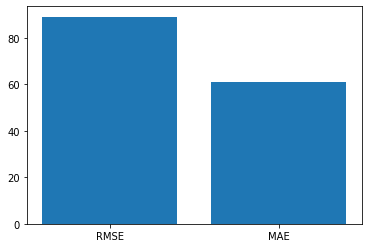

In [30]:
#LineRegression을 사용해 보자!
from sklearn.linear_model import LinearRegression

# Model
lr_model = LinearRegression()
lr_model.fit(train_X, train_y) 
pred = lr_model.predict(test_X)

result = evaluate_regr(test_y, pred) 
plt.bar(['RMSE','MAE'], result)

In [31]:
#Ridge 와 Lasso 사용
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge, Lasso

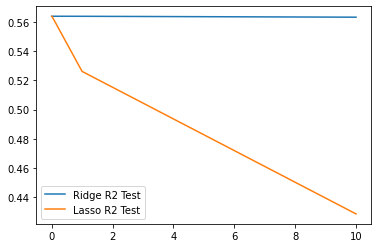

In [32]:
#R2 를 통해 성능을 비교해보자!
#일단 k-fold 사용하지 않았을 때는 Ridge와 Lasso 모두 alpha 가 0.001일때 제일 좋은 효능을 보인다. R2는 1에 가까울수록 좋당

# hyper-parameter 후보
alpha_list = [0.001, 0.01, 0.1, 1, 10]

from sklearn import metrics
from sklearn.metrics import r2_score 

# 각 모델을 비교하기 위한 평가지표인 r2-score를 저장할 장소
ridge_r2_list_train = []
ridge_r2_list_test = []
lasso_r2_list_train = []
lasso_r2_list_test = []

# 모든 'hyper-parameter'에 대해 하나씩 수행
for alpha in alpha_list:

   
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)

    ridge_model.fit(train_X,train_y)
    lasso_model.fit(train_X,train_y)

    ridge_r2_list_test.append(r2_score(test_y,ridge_model.predict(test_X)))
    lasso_r2_list_test.append(r2_score(test_y,lasso_model.predict(test_X)))
    
plt.plot(alpha_list, ridge_r2_list_test, label='Ridge R2 Test')
plt.plot(alpha_list, lasso_r2_list_test, label='Lasso R2 Test')

plt.legend()

In [33]:
# 차례로 'alpha = [0.001, 0.01, 0.1, 1, 10]'을 했을 때, Ridge모델에 대한 r2평가지표
ridge_r2_list_test

[0.5638760068150928,
 0.5638757624284818,
 0.5638732629924956,
 0.5638430088481227,
 0.5632315596866522]

In [34]:
# 차례로 'alpha = [0.001, 0.01, 0.1, 1, 10]'을 했을 때, Lasso모델에 대한 r2평가지표
lasso_r2_list_test

[0.5638706209646935,
 0.5637162396740553,
 0.5604784911443759,
 0.5261310907415142,
 0.4286120898021486]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.00585e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


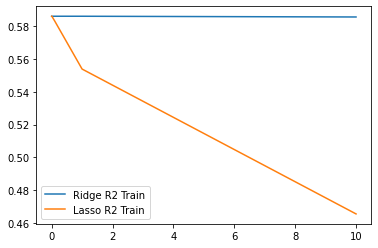

In [35]:
for alpha in alpha_list:

   
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)

    ridge_model.fit(train_X,train_y)
    lasso_model.fit(train_X,train_y)

    ridge_r2_list_train.append(np.mean(cross_val_score(ridge_model,train_X,train_y,scoring='r2',cv=10)))
    lasso_r2_list_train.append(np.mean(cross_val_score(lasso_model,train_X,train_y,scoring='r2',cv=10)))
    
plt.plot(alpha_list, ridge_r2_list_train, label='Ridge R2 Train')
plt.plot(alpha_list, lasso_r2_list_train, label='Lasso R2 Train')

plt.legend()
#k fold를 사용하였을 때의 결과 역시 비슷하다. alpha가 0.001일때 제일 효능이 좋다.

In [36]:
ridge_r2_list_train

[0.5861655460100168,
 0.5861656005927058,
 0.5861660654876368,
 0.5861632317686138,
 0.5857145593454309]

In [37]:
lasso_r2_list_train

[0.5861658235262206,
 0.5860644757460501,
 0.5832881200557349,
 0.553934196257561,
 0.4655108503221753]

In [38]:
#가장 좋은 성능이 나온 hyper-parameter값을 기준으로 모델을 제작한다.
#이전에는 반복문을 사용하여 가장 마지막 모델이 변수안에 들어갔기에, 다시 학습이 필요함

In [39]:
# 가장 성능이 좋은 모델의 hyper-parameter 확인

idx1 = np.array(ridge_r2_list_train).argsort()[::-1][0] # 가장 큰 것의 index
idx2 = np.array(lasso_r2_list_train).argsort()[::-1][0] # 가장 큰 것의 index

print('Ridge best alpha :', alpha_list[idx1])
print('Lasso best alpha :', alpha_list[idx2])

Ridge best alpha : 0.1
Lasso best alpha : 0.001


In [40]:
#Ridge와 Lasso에 적합한 alpha를 파악 했으니, 각자 해당하는 최적의 알파를 사용해 학습 시킨 후 성능일 비교해보자!
#R2, MSE, RMSE, MAE 모두를 사용해 보자!
ridge = Ridge(alpha=0.1) 
lasso = Lasso(alpha=0.001)

ridge.fit(train_X, train_y)
lasso.fit(train_X, train_y)

print("R square score for Ridge model : {:.5f}".format(r2_score(test_y, ridge.predict(test_X))))
print("R square score for Lasso model : {:.5f}".format(r2_score(test_y, lasso.predict(test_X))))

print("MSE for Ridge model : {:.5f}".format(mean_squared_error(test_y, ridge.predict(test_X))))
print("MSE for Lasso model : {:.5f}".format(mean_squared_error(test_y, lasso.predict(test_X))))

R square score for Ridge model : 0.56387
R square score for Lasso model : 0.56387
MSE for Ridge model : 7935.19916
MSE for Lasso model : 7935.24723


RMSE: 89.080, MAE: 60.926


<BarContainer object of 2 artists>

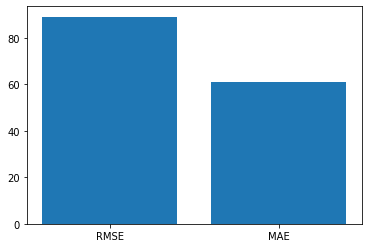

In [41]:
pred = ridge.predict(test_X) 

result = evaluate_regr(test_y, pred) 
plt.bar(['RMSE','MAE'], result)

RMSE: 89.080, MAE: 60.924


<BarContainer object of 2 artists>

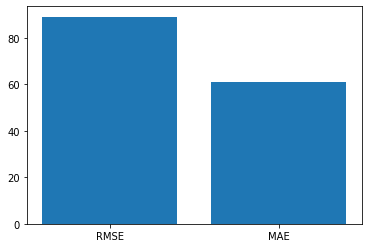

In [42]:
pred = lasso.predict(test_X) 

result = evaluate_regr(test_y, pred) 
plt.bar(['RMSE','MAE'], result)

In [43]:
#둘의 r2값은 동일하나 MSE 값에 있어서 ridge가 좀 더 작기 때문에 ridge 모델을 선택한다.

In [44]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,796 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=f

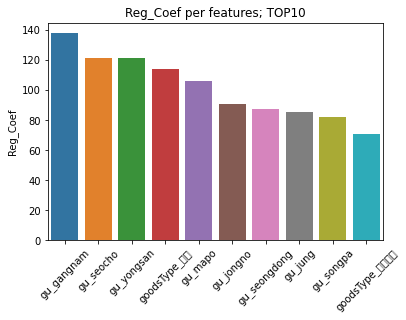

In [45]:
#변수의 중요도를 알아보자!
#우선 스케일링 없이 알아보자!


coef = ridge.coef_
coef_abs = np.abs(coef)

idx = coef_abs.argsort()[::-1]

coef_abs = coef_abs[idx]

name = X4_features.head(1).columns[idx].values



sns.barplot(name[0:10], coef_abs[0:10])
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features; TOP10')
plt.show()

In [46]:
#다음으로는 내가 제일 좋아하는 min-max scaling을 사용해 보겠다!
from sklearn.preprocessing import MinMaxScaler

total_data = pd.concat([X4_features, y_label], axis=1)

scaler = MinMaxScaler()
scaler.fit(total_data)
trans_data = scaler.transform(total_data)

trans_data_df = pd.DataFrame(data=trans_data, columns=total_data.columns)
trans_data_df.head(5) 

,realArea,deposit,gu_dongdaemun,gu_dongjak,gu_eunpyeong,gu_gangbuk,gu_gangdong,gu_gangnam,gu_gangseo,gu_guemcheon,gu_guro,gu_gwanak,gu_gwangjin,gu_jongno,gu_jung,gu_jungnang,gu_mapo,gu_nowon,gu_seocho,gu_seodaemun,gu_seongbuk,gu_seongdong,gu_songpa,gu_yangcheon,gu_yeongdeungpo,gu_yongsan,goodsType_빌라,goodsType_사무실,goodsType_상가,goodsType_아파트,goodsType_오피스텔,goodsType_오피스텔분양권,goodsType_원룸,goodsType_재건축,goodsType_전원주택,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향,monthlyPay
0,0.018197,0.000778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.067823
1,0.065343,0.002778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203470
2,0.069479,0.005556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.235016
3,0.066170,0.004444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.378549
4,0.040529,0.001111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235016


In [47]:
# minmax를 위한 'y_label', 'X_features' 만들기

y1_label = trans_data_df.loc[:,'monthlyPay']
X5_features = trans_data_df.drop(['monthlyPay'], axis=1)

In [48]:
train_X, test_X, train_y, test_y = train_test_split(X5_features, y1_label, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(24192, 42) (6049, 42) (24192,) (6049,)


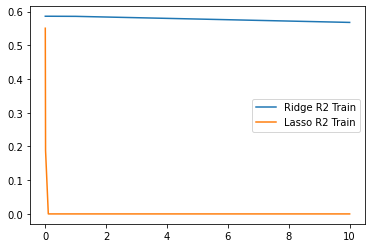

In [49]:
ridge1_r2_list_train = []
ridge1_r2_list_test = []
lasso1_r2_list_train = []
lasso1_r2_list_test = []

# 모든 'hyper-parameter'에 대해 하나씩 수행
for alpha in alpha_list:

   
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)

    ridge_model.fit(train_X,train_y)
    lasso_model.fit(train_X,train_y)

    ridge1_r2_list_train.append(np.mean(cross_val_score(ridge_model,train_X,train_y,scoring='r2',cv=10)))
    lasso1_r2_list_train.append(np.mean(cross_val_score(lasso_model,train_X,train_y,scoring='r2',cv=10)))
    
plt.plot(alpha_list, ridge1_r2_list_train, label='Ridge R2 Train')
plt.plot(alpha_list, lasso1_r2_list_train, label='Lasso R2 Train')

plt.legend()

In [50]:
ridge1_r2_list_train

[0.5861657013516485,
 0.586167105378277,
 0.5861763386451609,
 0.5858623688477795,
 0.5678811858962357]

In [51]:
lasso1_r2_list_train

[0.550612646854437,
 0.18732862978139705,
 -0.0002902380871480315,
 -0.0002902380871480315,
 -0.0002902380871480315]

In [52]:
idx3 = np.array(ridge1_r2_list_train).argsort()[::-1][0] # 가장 큰 것의 index
idx4 = np.array(lasso1_r2_list_train).argsort()[::-1][0] # 가장 큰 것의 index

print('Ridge best alpha :', alpha_list[idx3])
print('Lasso best alpha :', alpha_list[idx4])

Ridge best alpha : 0.1
Lasso best alpha : 0.001


In [53]:
ridge = Ridge(alpha=0.1) 
lasso = Lasso(alpha=0.001)

ridge.fit(train_X, train_y)
lasso.fit(train_X, train_y)

print("R square score for Ridge model : {:.5f}".format(r2_score(test_y, ridge.predict(test_X))))
print("R square score for Lasso model : {:.5f}".format(r2_score(test_y, lasso.predict(test_X))))

print("MSE for Ridge model : {:.5f}".format(mean_squared_error(test_y, ridge.predict(test_X))))
print("MSE for Lasso model : {:.5f}".format(mean_squared_error(test_y, lasso.predict(test_X))))

R square score for Ridge model : 0.56399
R square score for Lasso model : 0.53464
MSE for Ridge model : 0.01974
MSE for Lasso model : 0.02106


RMSE: 0.140, MAE: 0.096


<BarContainer object of 2 artists>

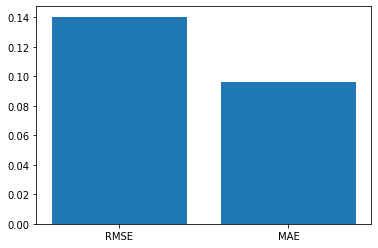

In [54]:
pred = ridge.predict(test_X) 

result = evaluate_regr(test_y, pred) 
plt.bar(['RMSE','MAE'], result)

RMSE: 0.145, MAE: 0.102


<BarContainer object of 2 artists>

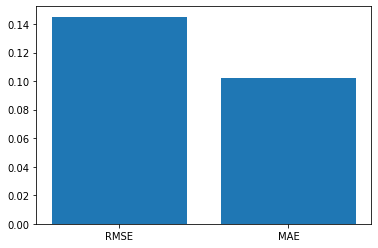

In [55]:
pred = lasso.predict(test_X) 

result = evaluate_regr(test_y, pred) 
plt.bar(['RMSE','MAE'], result)

In [56]:
#R2 점수는 높고 RMSE 와 MAE 가 모두 비교적 낮은 Ridge를 선택하자

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags

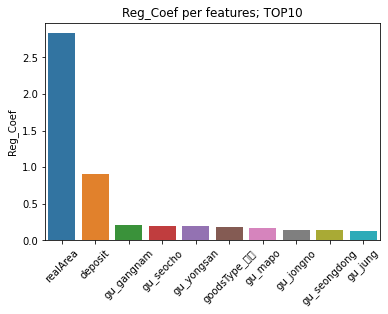

In [57]:
coef = ridge.coef_
coef_abs = np.abs(coef)

idx = coef_abs.argsort()[::-1]

coef_abs = coef_abs[idx]

name = X5_features.head(1).columns[idx].values



sns.barplot(name[0:10], coef_abs[0:10])
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features; TOP10')
plt.show()

#엥 스케일링 없이 했을 때와는 완전히 다른 결과가 나왔다!

In [58]:
#마지막으로 StandardScaler 를 사용해보자
from sklearn.preprocessing import StandardScaler

total_data = pd.concat([X5_features, y_label], axis=1)

scaler = StandardScaler()
scaler.fit(total_data)
trans_data = scaler.transform(total_data)

trans_data_df = pd.DataFrame(data=trans_data, columns=total_data.columns)
trans_data_df.head(1) 

,realArea,deposit,gu_dongdaemun,gu_dongjak,gu_eunpyeong,gu_gangbuk,gu_gangdong,gu_gangnam,gu_gangseo,gu_guemcheon,gu_guro,gu_gwanak,gu_gwangjin,gu_jongno,gu_jung,gu_jungnang,gu_mapo,gu_nowon,gu_seocho,gu_seodaemun,gu_seongbuk,gu_seongdong,gu_songpa,gu_yangcheon,gu_yeongdeungpo,gu_yongsan,goodsType_빌라,goodsType_사무실,goodsType_상가,goodsType_아파트,goodsType_오피스텔,goodsType_오피스텔분양권,goodsType_원룸,goodsType_재건축,goodsType_전원주택,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향,monthlyPay
0,-0.916755,-0.480007,-0.198375,-0.212026,-0.191799,-0.204945,-0.192724,-0.221721,-0.246858,-0.188532,-0.180971,-0.233377,-0.216667,-0.190218,-0.211002,-0.185883,-0.226442,-0.184546,-0.223113,-0.196295,-0.172921,-0.214399,-0.222377,-0.191799,-0.20477,-0.183297,-0.242149,1.800547,-0.68177,-0.473061,-0.197473,-0.033549,-0.324063,-0.057019,-0.005751,-0.376699,-0.621744,-0.425022,-0.23534,-0.224417,3.157342,-0.333021,NaN


In [59]:
ridge.coef_

array([ 2.82828035e+00, -9.07509354e-01,  5.21577831e-02,  8.21505996e-02,
        4.12013214e-02,  3.58287222e-02,  7.35197646e-02,  2.17300417e-01,
        7.76712050e-02,  5.70615682e-02,  4.40768873e-02,  6.42416779e-02,
        1.10622021e-01,  1.42557815e-01,  1.34359119e-01,  4.96631949e-02,
        1.66627285e-01,  3.03496824e-02,  1.91448453e-01,  8.70823658e-02,
        5.25871807e-02,  1.37366730e-01,  1.29393632e-01,  3.74384607e-02,
        8.01705740e-02,  1.91196470e-01,  3.65445291e-02,  8.09491881e-02,
        1.80120819e-01,  5.46129039e-02,  1.11663197e-01,  7.49573105e-02,
        3.28229353e-02, -1.08324339e-01,  5.31688201e-02,  1.52060159e-03,
       -1.93840252e-05,  1.54492020e-03,  8.18387784e-03,  9.98463272e-03,
        6.45328781e-03,  4.49297107e-03])